<a href="https://colab.research.google.com/github/laurenx1/learning-systems/blob/main/_ps4_generalization_error_bounding_n3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
from scipy import optimize

In [ ]:
def vc(N, d, delta):
    return math.sqrt( 8/N * (math.log(4 / delta) + 2*N*math.log(2))   )

def rad(N, d, delta):
    return math.sqrt(2/N * math.log(2 * N * 2**N )) + math.sqrt(-2/N * math.log(delta)) + 1/N

def par(N, d, delta):
    f = lambda err: math.sqrt((2*err + math.log(6/delta * 2**(2*N))  )/N) - err
    return optimize.brentq(f, 0, 5)

def dev(N, d, delta):
    f = lambda err: math.sqrt(   (4*err*(1+err) + math.log(4/delta * 2**(N**2))  )   /   (2* N)  ) - err
    return optimize.brentq(f, 0, 5)

In [ ]:
X = range(3, 8, 1)
d_vc = 50
delta = 0.05
colors = ['deeppink', 'mediumorchid', 'royalblue', 'darkturquoise']

In [ ]:
y_vc = [vc(N, d_vc, delta) for N in X]
y_rad = [rad(N, d_vc, delta) for N in X]
y_par = [par(N, d_vc, delta) for N in X]
y_dev = [dev(N, d_vc, delta) for N in X]

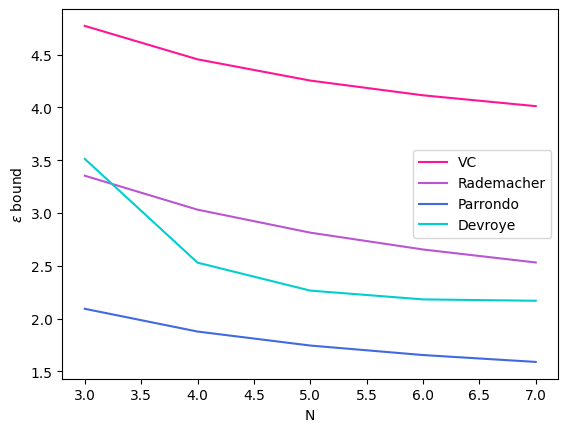

In [ ]:
figure = plt.figure(1, dpi=100)
plt.plot(X, y_vc, colors[0], label='VC')
plt.plot(X, y_rad, colors[1], label='Rademacher')
plt.plot(X, y_par, colors[2], label='Parrondo')
plt.plot(X, y_dev, colors[3], label='Devroye')

plt.xlabel('N')
plt.ylabel('$\epsilon$ bound')
plt.legend()
plt.show()